#Metyis: Desafío Científico de Datos#

Andrea Azabal Lamoso
18/11/2021

## 1. Descargar *dataset*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
! pip install -q kaggle

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"andreaazabal","key":"5f6f61a6224d585dab392d472934194a"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d ishansingh88/europe-hotel-satisfaction-score

  0% 0.00/1.35M [00:00<?, ?B/s]
100% 1.35M/1.35M [00:00<00:00, 22.2MB/s]


In [ ]:
! unzip europe-hotel-satisfaction-score.zip

Archive:  europe-hotel-satisfaction-score.zip
  inflating: Europe Hotel Booking Satisfaction Score.csv  


In [ ]:
path = "/content/Europe Hotel Booking Satisfaction Score.csv"
df = pd.read_csv(path, sep=",")
print(df.shape)
df.head()

(103904, 17)


,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              103904 non-null  int64 
 1   Gender                          103904 non-null  object
 2   Age                             103904 non-null  int64 
 3   purpose_of_travel               103904 non-null  object
 4   Type of Travel                  103904 non-null  object
 5   Type Of Booking                 103904 non-null  object
 6   Hotel wifi service              103904 non-null  int64 
 7   Departure/Arrival  convenience  103904 non-null  int64 
 8   Ease of Online booking          103904 non-null  int64 
 9   Hotel location                  103904 non-null  int64 
 10  Food and drink                  103904 non-null  int64 
 11  Stay comfort                    103904 non-null  int64 
 12  Common Room entertainment     

In [ ]:
np.sum(df.isnull())

id                                0
Gender                            0
Age                               0
purpose_of_travel                 0
Type of Travel                    0
Type Of Booking                   0
Hotel wifi service                0
Departure/Arrival  convenience    0
Ease of Online booking            0
Hotel location                    0
Food and drink                    0
Stay comfort                      0
Common Room entertainment         0
Checkin/Checkout service          0
Other service                     0
Cleanliness                       0
satisfaction                      0
dtype: int64

No hay nulos en la base de datos.

In [ ]:
df.describe()

,id,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,64924.210502,39.379706,2.729683,3.060296,2.756901,2.976883,3.202129,3.439396,3.358158,3.304290,3.640428,3.286351
std,37463.812252,15.114964,1.327829,1.525075,1.398929,1.277621,1.329533,1.319088,1.332991,1.265396,1.175663,1.312273
min,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000
50%,64856.500000,40.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,97368.250000,51.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000
max,129880.000000,85.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


No hay valores erróneos: la edad está comprendida entre 7 y 85 años y las puntuaciones entre 0 y 5.

##2. Visualización de los datos

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

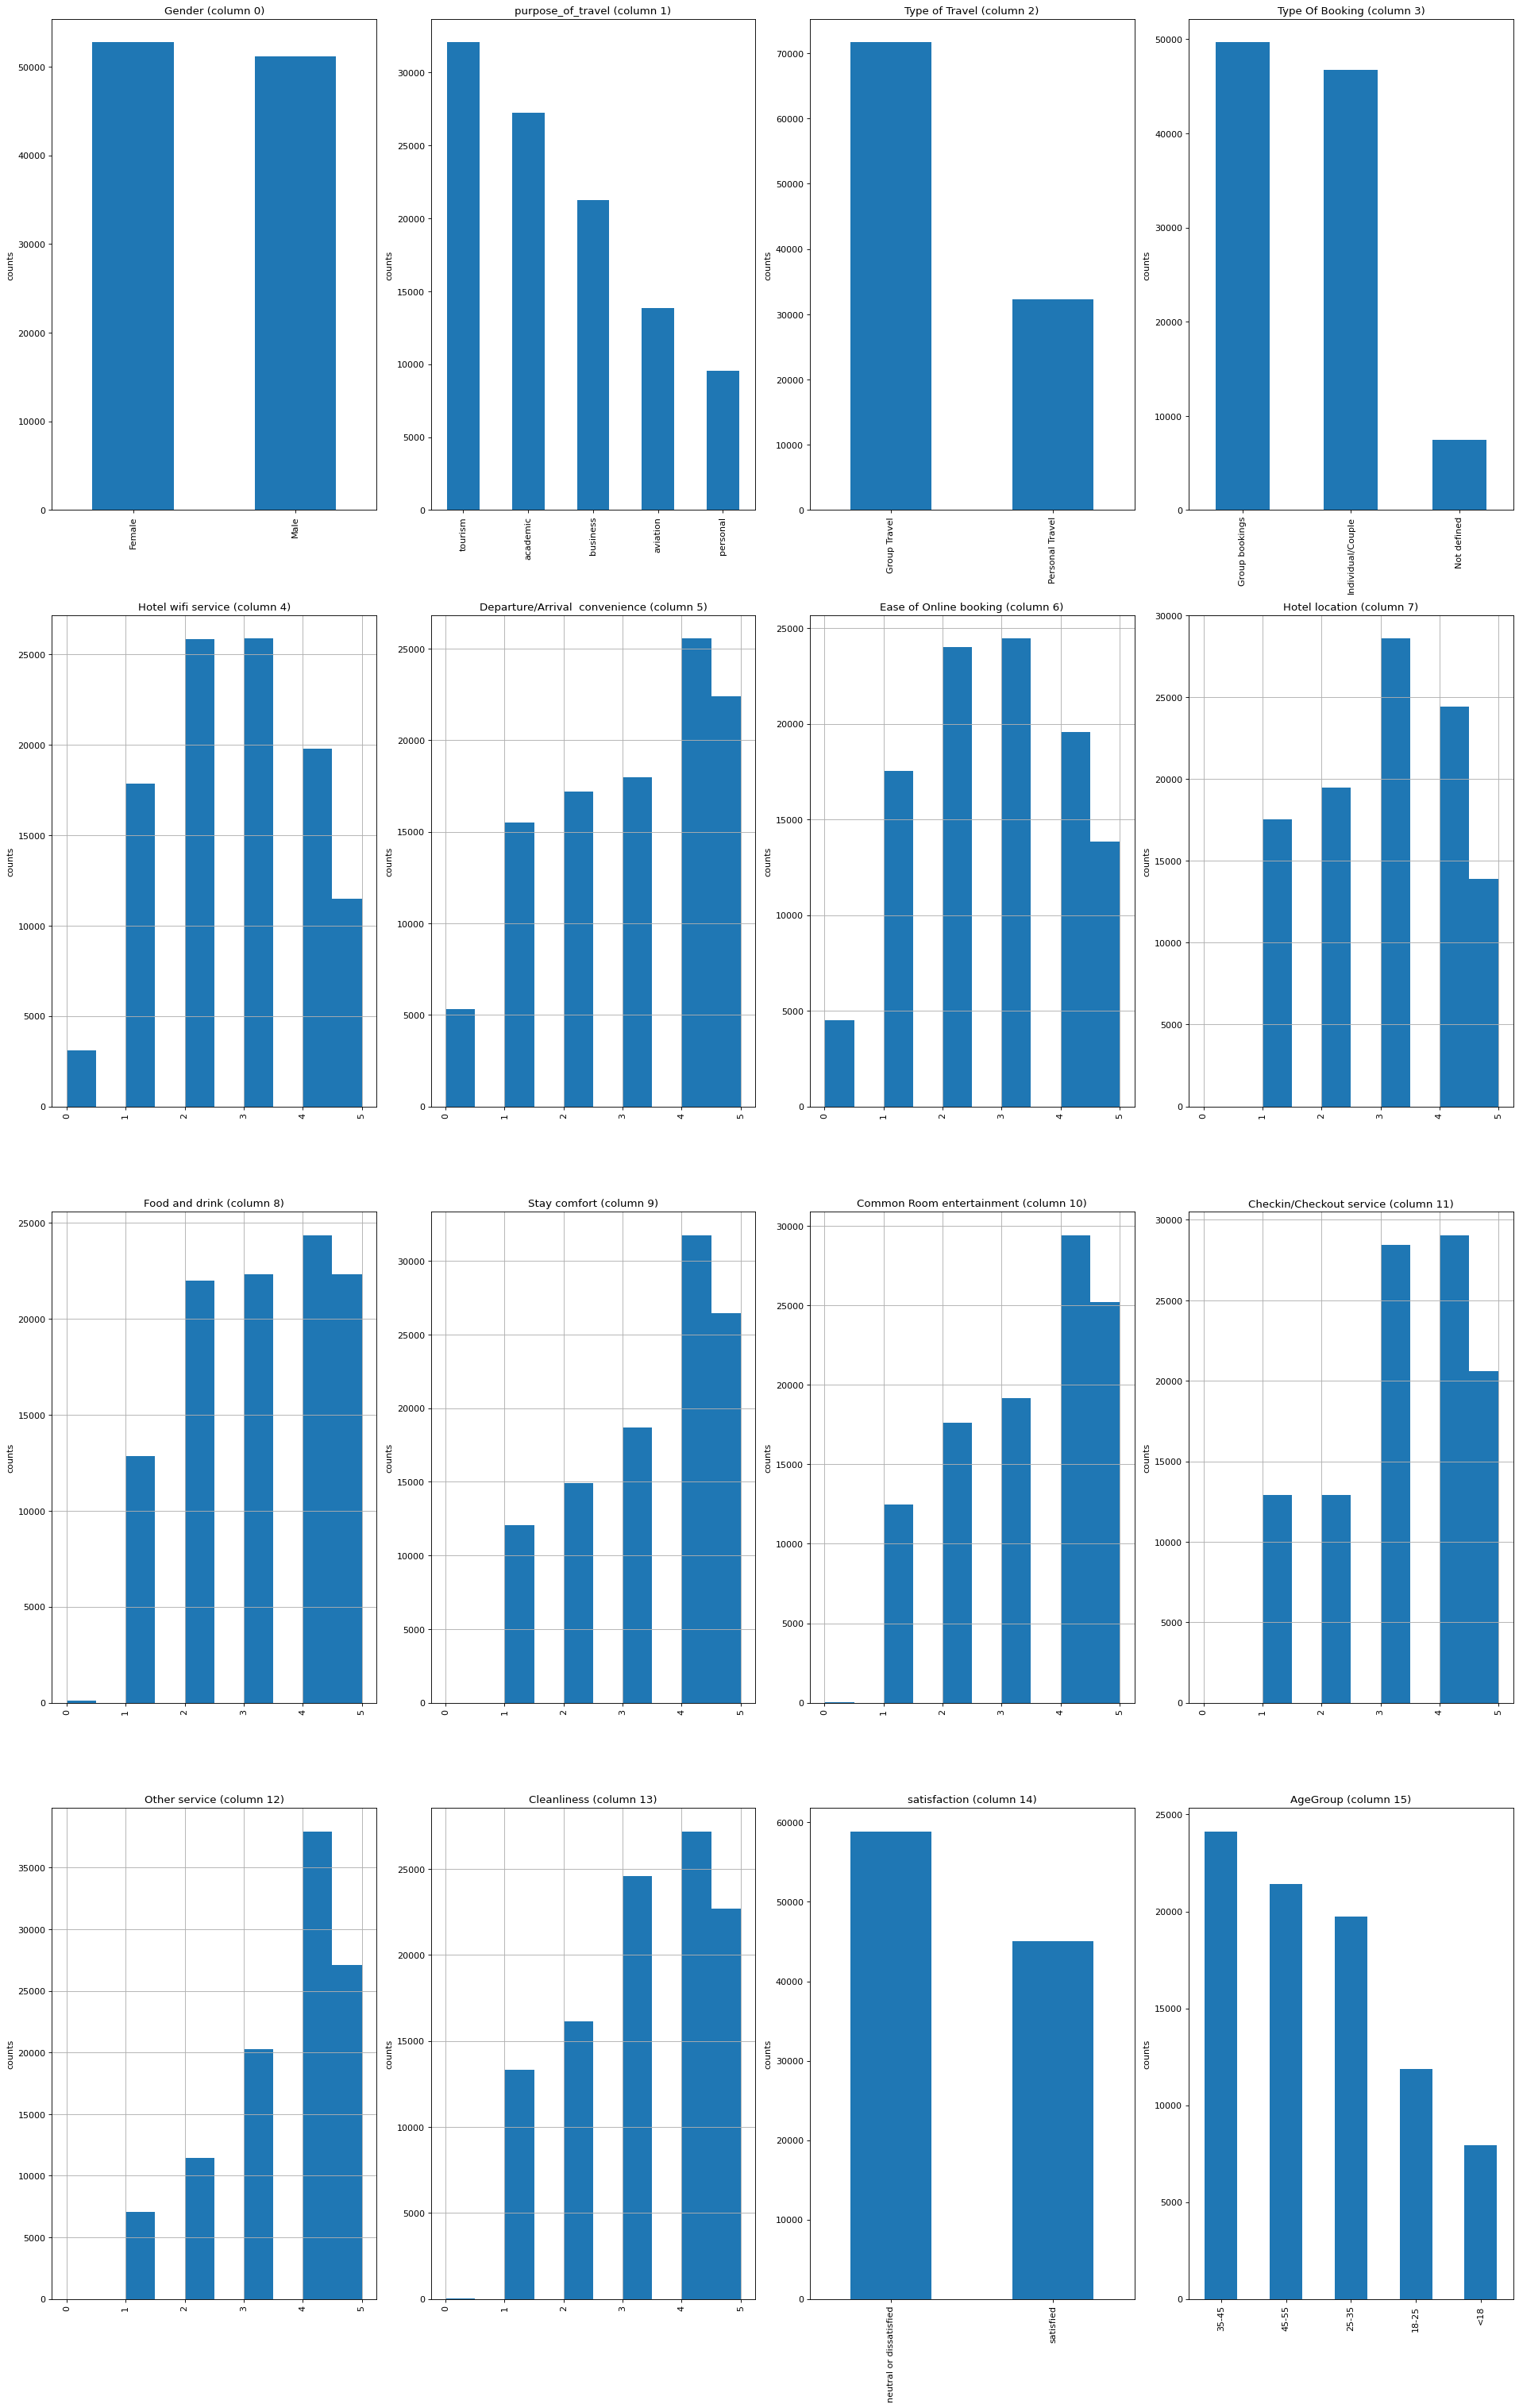

In [ ]:
plotPerColumnDistribution(df, 17, 4)

Comprobamos que el campo "tipo de reserva" presenta un gran número de "no definidos", por lo que por simplicidad no se utilizará este campo en los análisis posteriores.

Correlación entre variables numéricas:

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

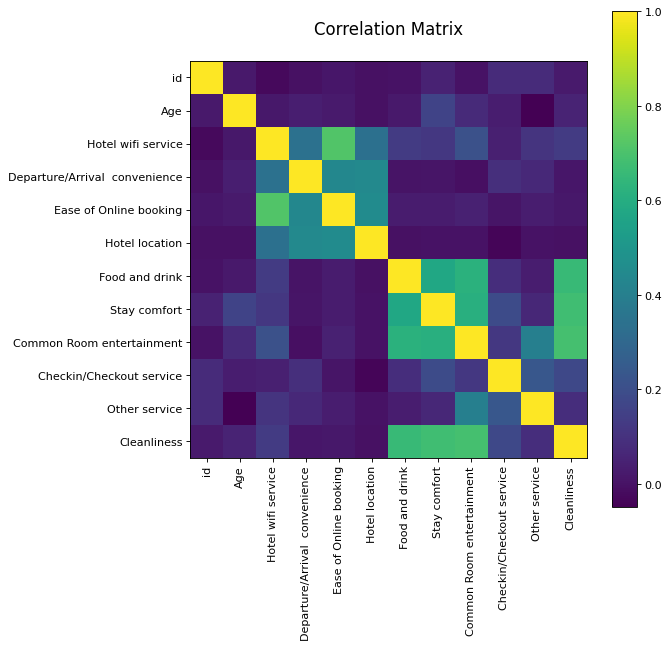

In [ ]:
plotCorrelationMatrix(df, 8)

Se observa que la variable "Wifi" está correlacionada con la facilidad de reserva online. También están correlacionadas entre sí la "limpieza", la "comida y bebida", la "comodidad de la estancia" y el "entretenimiento en la sala común".

## 3. Preparación de los datos

Eliminar campos innecesarios:

In [ ]:
# Eliminar id
df1=df.copy()
df1.drop(columns=['id'], inplace=True)

Calcular nota media total de cada cliente:

In [ ]:
# Promedio
df1['totsas']=df1.iloc[:,4:14].mean(axis=1)

Creo grupos para la edad:

In [ ]:
bins= [0,18,25,35,45,55,65,120] #cortes en Age
labels = ['<18','18-25','25-35','35-45','45-55','55-65','>65'] #etiquetas
df1['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df1.drop(columns=['Age'], inplace=True) #elimino la edad

Como referencia, vemos que la **nota media global del hotel** es:

In [ ]:
df1['totsas'].mean()

3.163129213290947

## 4. Análisis

Vamos a ver cómo varía la puntuación total para cada grupo de clientes.

### Género

In [ ]:
pd.DataFrame(df1.groupby(by=["Gender"])['totsas'].mean('totsas'))

,totsas
Gender,
Female,3.154747
Male,3.171766


No hay grandes diferencias en el género.

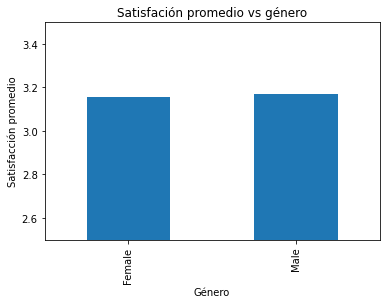

In [ ]:
df1.groupby('Gender')['totsas'].mean().plot.bar()
plt.title("Satisfación promedio vs género")
plt.xlabel("Género");
plt.ylabel("Satisfacción promedio");
plt.ylim([2.5,3.5])
plt.show()

### Edad

In [ ]:
pd.DataFrame(df1.groupby(by=["AgeGroup"])['totsas'].mean('totsas'))

,totsas
AgeGroup,
<18,3.053111
18-25,3.063007
25-35,3.109798
35-45,3.196295
45-55,3.264904
55-65,3.210285
>65,3.051601


Los grupos que mayor disatisfacción muestran son los muy jóvenes (<18 años) y los muy mayores (>65 años).

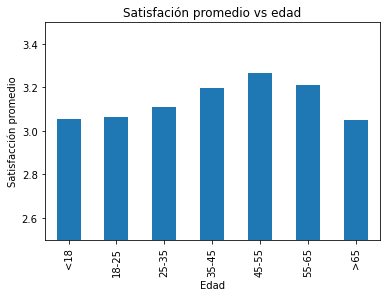

In [ ]:
df1.groupby('AgeGroup')['totsas'].mean().plot.bar()
plt.title("Satisfación promedio vs edad")
plt.xlabel("Edad");
plt.ylabel("Satisfacción promedio");
plt.ylim([2.5,3.5])
plt.show()

### Motivo del viaje

In [ ]:
pd.DataFrame(df1.groupby(by=["purpose_of_travel"])['totsas'].mean('totsas'))

,totsas
purpose_of_travel,
academic,3.183423
aviation,3.166330
business,3.179056
personal,3.176623
tourism,3.169884


No hay grandes discrepancias entre estas categorías.

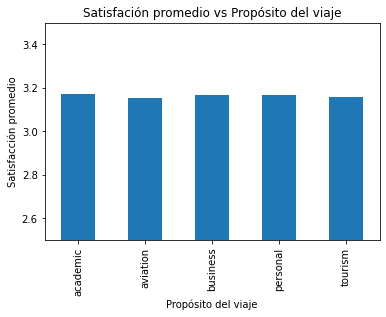

In [ ]:
df1.groupby('purpose_of_travel')['totsas'].mean().plot.bar()
plt.title("Satisfación promedio vs Propósito del viaje")
plt.xlabel("Propósito del viaje");
plt.ylabel("Satisfacción promedio");
plt.ylim([2.5,3.5])

plt.show()

### Tipo de viaje

In [ ]:
pd.DataFrame(df1.groupby(by=["Type of Travel"])['totsas'].mean('totsas'))

,totsas
Type of Travel,
Group Travel,3.210650
Personal Travel,3.097243


Vemos que los viajes personales presentan peores puntuaciones. Si profundizamos en este resultado y dividimos por edad, vemos que los más jóvenes y los más mayores invierten la tendencia, pues para estos dos subgrupos los viajes grupales son menos satisfactorios:

In [ ]:
pd.DataFrame(df1.groupby(by=["AgeGroup","Type of Travel"])['totsas'].mean('totsas'))

totsas
AgeGroup Type of Travel           
<18      Group Travel     3.006818
         Personal Travel  3.070916
18-25    Group Travel     3.069989
         Personal Travel  3.078524
25-35    Group Travel     3.139018
         Personal Travel  3.084727
35-45    Group Travel     3.233788
         Personal Travel  3.111512
45-55    Group Travel     3.331235
         Personal Travel  3.120914
55-65    Group Travel     3.290773
         Personal Travel  3.103556
>65      Group Travel     2.954199
         Personal Travel  3.116172

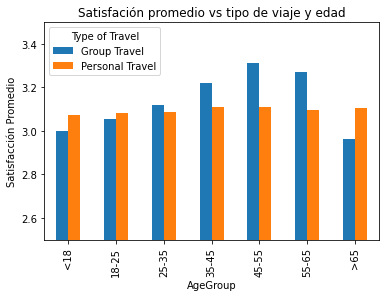

In [ ]:
df1.groupby(by=["AgeGroup","Type of Travel"])['totsas'].mean('totsas').unstack().plot(kind='bar')

plt.title("Satisfación promedio vs tipo de viaje y edad")
plt.ylabel("Satisfacción Promedio");
plt.ylim([2.5,3.5])

plt.show()

### 10 peores grupos

Si obtenemos los 10 grupos menos satisfechos en función del género, edad, tipo de viaje y propósito del viaje y calculamos los estadísticos más relevantes:

In [ ]:
satisfaction=pd.DataFrame(df1.groupby(by=["Gender", "AgeGroup", "purpose_of_travel", "Type of Travel"])['totsas'].agg(['count','mean', 'min', 'std', 'max'])).copy()

In [ ]:
satisfaction.sort_values(by='mean').head(10)

count  ...       max
Gender AgeGroup purpose_of_travel Type of Travel         ...          
Female >65      aviation          Group Travel      114  ...  4.555556
Male   >65      aviation          Group Travel       99  ...  4.666667
Female >65      tourism           Group Travel      301  ...  4.666667
       <18      personal          Group Travel      110  ...  4.333333
Male   >65      business          Group Travel      168  ...  4.888889
       <18      tourism           Group Travel      350  ...  4.777778
Female >65      business          Group Travel      174  ...  4.333333
       <18      academic          Group Travel      304  ...  5.000000
Male   >65      personal          Group Travel       74  ...  4.777778
       <18      aviation          Group Travel      134  ...  4.888889

[10 rows x 5 columns]

Estos 10 peores grupos únicamente suponen un 1.76% de la muestra total:

In [ ]:
(pd.DataFrame(satisfaction.sort_values(by='mean').head(10))['count'].sum())/len(df1)*100

1.759316291961811

Por tanto, con el objetivo de aumentar el *target*, vamos a ser más flexibles con el criterio de selección del grupo de insatisfechos. 

Comprobamos que hay mucha diversidad en el propósito del viaje, por lo que no vamos a seleccionar este campo ni tampoco el género por no considerarlos relevantes. Así, se llega a la conclusión de que **los clientes menos satisfechos son aquellos que viajan en grupo y bien son menores de 18 años o bien son mayores de 65 años**.

Nos quedamos con este subgrupo del *dataset*, que contiene 4030 registros.

In [ ]:
no_satis=df1[((df1.AgeGroup=='>65') | (df1.AgeGroup=='<18')) & (df1['Type of Travel']=='Group Travel')].copy()

In [ ]:
len(no_satis)/len(df1)*100

3.8785802279026798

Hemos aumentado el tamaño de la submuestra hasta casi un 4%, que sigue siendo relativamente bajo pero por el momento vamos a trabajar sobre este grupo.

Procedemos a calcular los promedios de las puntuaciones otorgadas a cada servicio por el grupo de los insatisfechos.

In [ ]:
resultado=pd.DataFrame([no_satis.iloc[:,4:14].mean()]).T.rename(columns={0: 'Score'}).sort_values(by='Score') #score clientes insatisfechos

Es decir, el servicio peor puntuado es el WiFi, seguido de la comodidad en la llegada/salida del hotel.

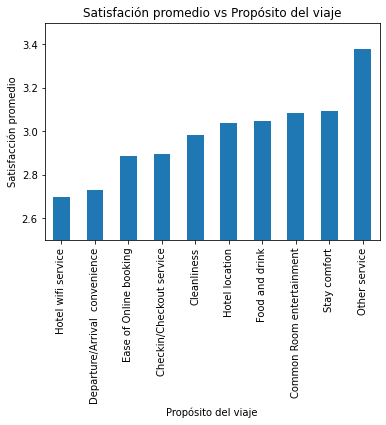

In [ ]:
resultado['Score'].plot.bar()
plt.title("Satisfación promedio vs Propósito del viaje")
plt.xlabel("Propósito del viaje");
plt.ylabel("Satisfacción promedio");
plt.ylim([2.5,3.5])

plt.show()

Vemos las puntuaciones promedio de estos servicios dadas por el resto de clientes (sin incluir el grupo de insatisfechos).

In [ ]:
new_df = df1.drop(no_satis.index) #score del resto de clientes
new_df.mean()

Hotel wifi service                2.731041
Departure/Arrival  convenience    3.073663
Ease of Online booking            2.751647
Hotel location                    2.974358
Food and drink                    3.208343
Stay comfort                      3.453381
Common Room entertainment         3.369235
Checkin/Checkout service          3.320704
Other service                     3.650990
Cleanliness                       3.298606
totsas                            3.170374
dtype: float64

Comprobamos que, mientras el servicio de WiFi tiene una puntuación similar en ambos grupos, lo cual indica que es un servicio que todos los clientes consideran como malo, la comodidad en la salida/llegada sí que presenta una discrepancia considerable.

In [ ]:
new_df['Departure/Arrival  convenience'].mean()

3.0736628151470855

Si el hotel mejorara el servicio de llegada/salida, siendo conservadores suponemos que la puntuación del grupo de insatisfechos alcanzaría el promedio del resto de clientes, es decir, subiría de 2.73 a 3.07. En la realidad, probablemente si este servicio mejora, entonces la puntuación de todos los clientes aumentará, por lo que el promedio final será superior al 3.07 indicado. Esto se traduciría en un aumento de la satisfacción global del hotel.

Si realizamos un cálculo simple en el que los clientes insatisfechos modifican su nota a un 3 en este campo:

In [ ]:
df2=df1.copy()

In [ ]:
df2.loc[((df1.AgeGroup=='>65') | (df1.AgeGroup=='<18')) & (df1['Type of Travel']=='Group Travel'), 'Departure/Arrival convenience']=3 #nueva puntuacion

El nuevo promedio global pasaría a ser el siguiente:

In [ ]:
df2['new_totsas']=df1.iloc[:,4:14].mean(axis=1)

La nueva puntuación global promedio es de:

In [ ]:
df2['new_totsas'].mean()

3.1754513781953086

Que es superior a la original:

In [ ]:
df1['totsas'].mean()

3.163129213290947

##Conclusiones

Se ha realizado un análisis sencillo de las valoraciones otorgadas a un hotel por parte de sus clientes con el objetivo de crear una estrategia de mejora en los servicios más relevantes. En primer lugar, se han validado las características del *dataset*, comprobando que no hay necesidad de eliminar *outliers* o realizar grandes correcciones, sino que basta con eliminar algunos campos que no aportan valor al análisis posterior. También se han representado los mismos y sus correlaciones.

A continuación, se ha estudiado la puntuación promedio en función de las principales caracterísiticas de cada cliente, obteniéndose los siguientes *insigths*:  

- El grupo de clientes más insatisfechos está formado **por menores de 18 años y mayores de 65 años que viajan en grupo**.

- Para este grupo, los servicios peor valorados son el **WiFi y la comodidad de llegada/salida al hotel**.

- Mejorando la comodidad de llegada/salida al hotel, podría **mejorarse la puntuación promedio global del hotel** (cálculo muy conservador).  

Como pasos a llevar a cabo a continuación, se podría:

- Buscar **un grupo de insatisfechos de mayor tamaño** (más significativo) cuya mejora en la valoración contribuya de manera más notable a la puntuación global, como podría ser por ejemplo todos los viajeros de tipo personal.

- **Mejorar el servicio de Wifi**, ya que es relativamente sencillo y sería muy beneficioso al tratarse del servicio peor valorado del hotel.